# <h1><center> <span style='color:darkblue'> <b> Credit Card Fraud Detection </b> </span> </center></h1>

In [68]:
import pandas as pd 

import matplotlib.pylab as plt 
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import confusion_matrix,classification_report

sns.set(style='dark', color_codes=True,palette="magma")

In [69]:
df=pd.read_csv('C:\\Users\\Ekko\\Downloads\\archive\\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [70]:
df.shape

(284807, 31)

In [71]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [72]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# EDA

0    284315
1       492
Name: Class, dtype: int64


<AxesSubplot:>

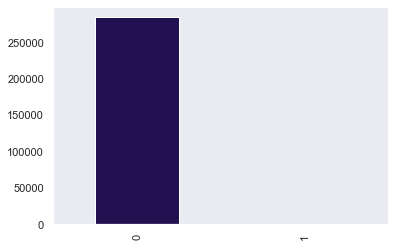

In [73]:
q=df.Class.value_counts()
print(q)
q.plot.bar()

#### we can see that is imbalance dataset
#### so we expect high accuracy

<AxesSubplot:>

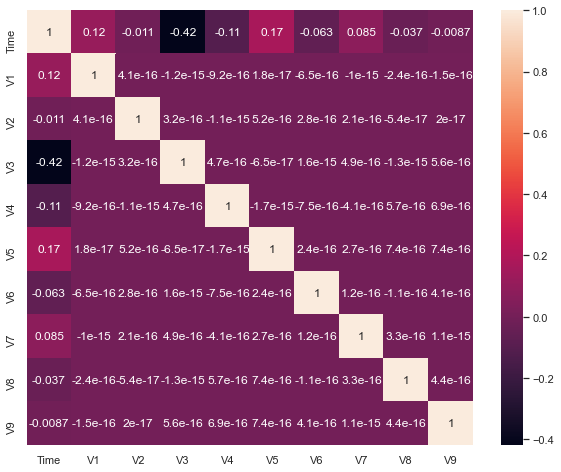

In [74]:
df1=df.iloc[:,0:10].copy()
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True)

<AxesSubplot:>

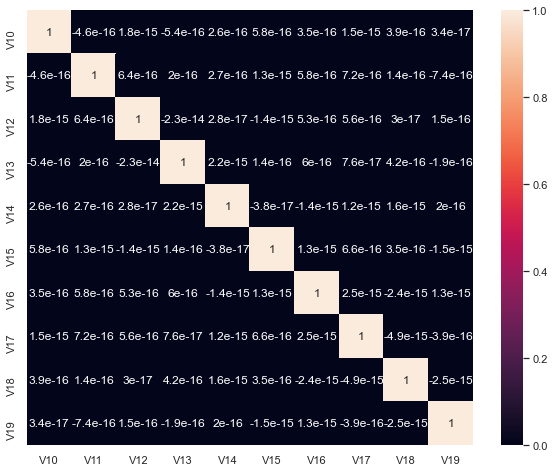

In [75]:
df2=df.iloc[:,10:20].copy()
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(),annot=True)

<AxesSubplot:>

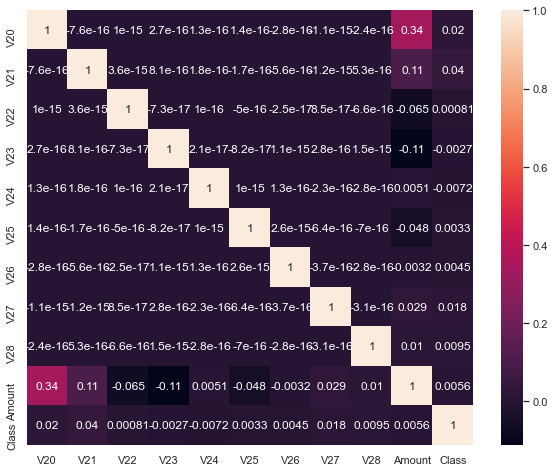

In [76]:
df3=df.iloc[:,20:].copy()
plt.figure(figsize=(10,8))
sns.heatmap(df3.corr(),annot=True)

In [77]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Time Distribution')

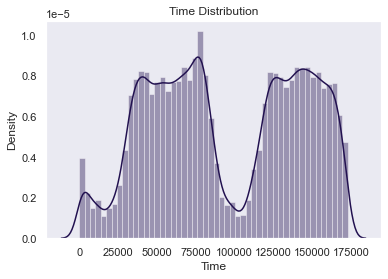

In [100]:
# time distribution
sns.distplot(df.Time)
plt.title('Time Distribution')

# Building Model

In [80]:
df=shuffle(df)
x=df.drop('Class',axis=1)
y=df.Class

In [81]:
# Principal Component Analysis
pca=PCA(n_components=15)
x_pca=pca.fit_transform(x)

In [82]:
x_pca.shape

(284807, 15)

In [83]:
# train test data
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.2)

In [84]:
# evaluation function
def model_evaluation(model,x_test,y_test):
    # y predict
    y_pred=model.predict(x_test)
    
    # confusion_matrix
    cn=confusion_matrix(y_test,y_pred)
    
    # classification report
    cr=classification_report(y_test,y_pred)
    print(cr)
    
    # heat map visualization
    sns.heatmap(cn,annot=True)    

#### Logistic Regression

In [85]:
model1=LogisticRegression(max_iter=1000)
model1.fit(x_train,y_train)
model1.score(x_test,y_test)

0.9992977774656788

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56883
           1       0.82      0.63      0.71        79

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



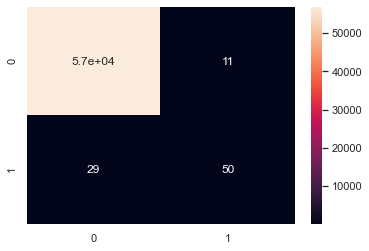

In [86]:
model_evaluation(model1,x_test,y_test)

#### Random Forest

In [87]:
model2=RandomForestClassifier(n_estimators=40)
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.9996488887328394

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56883
           1       0.98      0.76      0.86        79

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



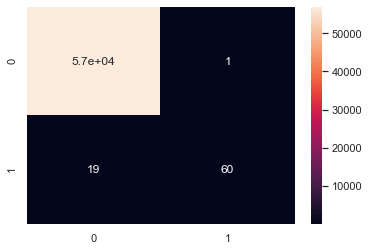

In [88]:
model_evaluation(model2,x_test,y_test)

#### KNN

In [89]:
# knn model
model3=KNeighborsClassifier(n_neighbors=5)
model3.fit(x_train,y_train)
model3.score(x_test,y_test)

0.998718443874864

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56883
           1       1.00      0.08      0.14        79

    accuracy                           1.00     56962
   macro avg       1.00      0.54      0.57     56962
weighted avg       1.00      1.00      1.00     56962



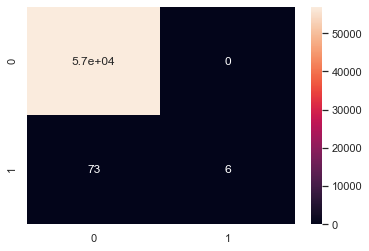

In [90]:
model_evaluation(model3,x_test,y_test)

# Trying ANN for imbalancing data

In [91]:
model =keras.Sequential([
    keras.layers.Dense(30,input_dim=15,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

# weighs for imbalancing data  
w={0:1,1:577}

model.fit(x_train, y_train, epochs=10,class_weight = w)


Epoch 1/10
7121/7121 [==============================] - 7s 999us/step - loss: 536.4923 - accuracy: 0.5309: 6s - loss: 956. - ETA: 5s - loss: 909.8074 - accuracy:  - ETA: 5s - loss: 867.7772 - accuracy: 0.56 - ETA: 4s - loss: 775.0332 - accuracy:  - ETA: 4s - loss: 743.8436 - accuracy: 0.53 - ETA: 4s - loss: 745.8196 - accuracy - ETA: 4s - loss: 743 - E - ETA: 2s - loss: 665.8916 - accuracy: 0.52 - ETA: 2s - loss: 660.7917 - accuracy: 0.52 - ETA: 2s - loss: 656.7592 - accuracy: 0. -
Epoch 2/10
7121/7121 [==============================] - 7s 942us/step - loss: 130.5159 - accuracy: 0.50935s - loss: 261.042 - ETA: 5s - los - ETA: 4s - loss: 189.2 - ETA: 3s - loss: 169.1 - ETA: 3s - loss: 160.8109 - accuracy: 0. - ETA: 3s - loss: 160.7185 - accuracy: 0. - E - ETA - ETA: 1s - loss: 141.5121 - accuracy: 0. - ETA: 0s - loss: 140.0394 - accuracy: 0.50 - ETA: 0s - l - ETA: 0s - loss: 131.3629 - accuracy: 0.
Epoch 3/10
7121/7121 [==============================] - 7s 939us/step - loss: 30.6865 - a

In [92]:
model.evaluate(x_test,y_test)

1781/1781 [==============================] - 1s 665us/step - loss: 0.6879 - accuracy: 0.99830s - loss: 0.6879 - accuracy: 0.


[0.6879122257232666, 0.9983497858047485]

In [93]:
y_pred=model.predict(x_test)
matrix=[]
for i in y_pred:
    if i > .5:
        matrix.append(1)
    else:   
        matrix.append(0)


In [94]:
confusion_matrix(y_test,matrix)

array([[56861,    22],
       [   72,     7]], dtype=int64)

In [95]:
print(classification_report(y_test,matrix))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56883
           1       0.24      0.09      0.13        79

    accuracy                           1.00     56962
   macro avg       0.62      0.54      0.56     56962
weighted avg       1.00      1.00      1.00     56962

